# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in your list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create parameters for the API request
    params = {
        'q': city,
        'appid': weather_api_key  # Make sure to replace 'weather_api_key' with your actual API key
    }

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each city
    try:
        # Perform the API request
        response = requests.get(url, params=params)
        
        # Check if the response status code is 200 (OK)
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print("City not found. Skipping...")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"An error occurred while processing {city}: {e}")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hammerfest
Processing Record 2 of Set 1 | howard springs
Processing Record 3 of Set 1 | shubarkuduk
Processing Record 4 of Set 1 | salinopolis
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | cestos city
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | phang nga
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | key west
Processing Record 13 of Set 1 | argo
Processing Record 14 of Set 1 | takoradi
Processing Record 15 of Set 1 | zouerate
Processing Record 16 of Set 1 | kayangel
Processing Record 17 of Set 1 | tommot
Processing Record 18 of Set 1 | san agustin
Processing Record 19 of Set 1 | port lincoln
Processing Record 20 of Set 1 | taungoo
Processing Record 21 of Set 1 | ustka
Processing Record 22 of Set 1 | qarauyl
Processing Reco

Processing Record 39 of Set 4 | bryne
Processing Record 40 of Set 4 | waiuku
Processing Record 41 of Set 4 | prado
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | kratie
Processing Record 44 of Set 4 | papatowai
Processing Record 45 of Set 4 | oranjemund
Processing Record 46 of Set 4 | mana
Processing Record 47 of Set 4 | zwedru
Processing Record 48 of Set 4 | isafjordur
Processing Record 49 of Set 4 | anadyr
Processing Record 0 of Set 5 | palikir - national government center
Processing Record 1 of Set 5 | college
Processing Record 2 of Set 5 | nar'yan-mar
Processing Record 3 of Set 5 | zigong
Processing Record 4 of Set 5 | cambria
Processing Record 5 of Set 5 | yuncheng
Processing Record 6 of Set 5 | olenino
Processing Record 7 of Set 5 | gafanha da nazare
Processing Record 8 of Set 5 | midvagur
Processing Record 9 of Set 5 | port elizabeth
Processing Record 10 of Set 5 | klyuchi
Processing Record 11 of Set 5 | laminusa
Processing Record 12 of Set 5 | berezn

Processing Record 31 of Set 8 | borkum
Processing Record 32 of Set 8 | conde
Processing Record 33 of Set 8 | norilsk
Processing Record 34 of Set 8 | juan de acosta
Processing Record 35 of Set 8 | harar
Processing Record 36 of Set 8 | chilca
Processing Record 37 of Set 8 | gadzhiyevo
Processing Record 38 of Set 8 | valday
Processing Record 39 of Set 8 | caleta de carquin
Processing Record 40 of Set 8 | regeneracao
Processing Record 41 of Set 8 | mahdia
Processing Record 42 of Set 8 | kamakwie
Processing Record 43 of Set 8 | yamaga
Processing Record 44 of Set 8 | neryungri
Processing Record 45 of Set 8 | genhe
Processing Record 46 of Set 8 | sitka
Processing Record 47 of Set 8 | sao felix do xingu
Processing Record 48 of Set 8 | kavieng
Processing Record 49 of Set 8 | spring creek
Processing Record 0 of Set 9 | sharypovo
Processing Record 1 of Set 9 | santa rosa del sara
City not found. Skipping...
Processing Record 2 of Set 9 | okhotsk
Processing Record 3 of Set 9 | hailar
Processing Re

Processing Record 18 of Set 12 | bam
Processing Record 19 of Set 12 | shimo-furano
Processing Record 20 of Set 12 | jalqani
Processing Record 21 of Set 12 | kaindy
Processing Record 22 of Set 12 | turochak
Processing Record 23 of Set 12 | jeremoabo
Processing Record 24 of Set 12 | isfahan
Processing Record 25 of Set 12 | rikaze
Processing Record 26 of Set 12 | mangai
Processing Record 27 of Set 12 | tluszcz
Processing Record 28 of Set 12 | villanueva
Processing Record 29 of Set 12 | kolonia
Processing Record 30 of Set 12 | mae chan
Processing Record 31 of Set 12 | viitasaari
Processing Record 32 of Set 12 | deir ez-zor
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Import the Pandas library
import pandas as pd

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count for each column
record_counts = city_data_df.count()
print(record_counts)

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hammerfest,70.6634,23.6821,276.40,70,40,4.63,NO,1696180100
1,howard springs,-12.4970,131.0470,300.10,79,42,0.53,AU,1696180100
2,shubarkuduk,49.1447,56.4872,289.65,49,82,3.15,KZ,1696180100
3,salinopolis,-0.6136,-47.3561,302.51,69,53,7.53,BR,1696180101
4,west island,-12.1568,96.8225,299.14,73,75,7.72,CC,1696180101


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hammerfest,70.6634,23.6821,276.40,70,40,4.63,NO,1696180100
1,howard springs,-12.4970,131.0470,300.10,79,42,0.53,AU,1696180100
2,shubarkuduk,49.1447,56.4872,289.65,49,82,3.15,KZ,1696180100
3,salinopolis,-0.6136,-47.3561,302.51,69,53,7.53,BR,1696180101
4,west island,-12.1568,96.8225,299.14,73,75,7.72,CC,1696180101


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

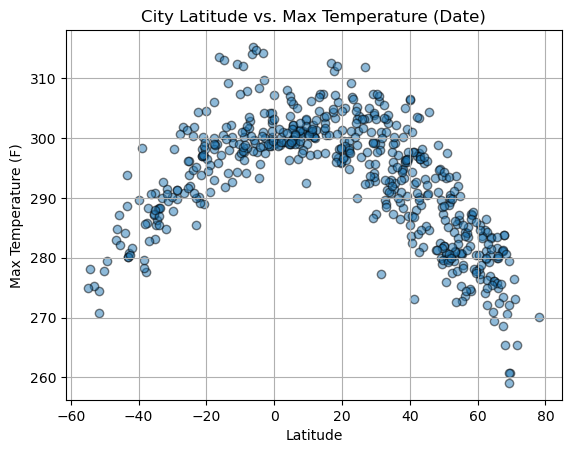

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.5)

# Set the title and labels
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Incorporate grid lines
plt.grid()

# Save the figure
plt.savefig("output_data/Fig01.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

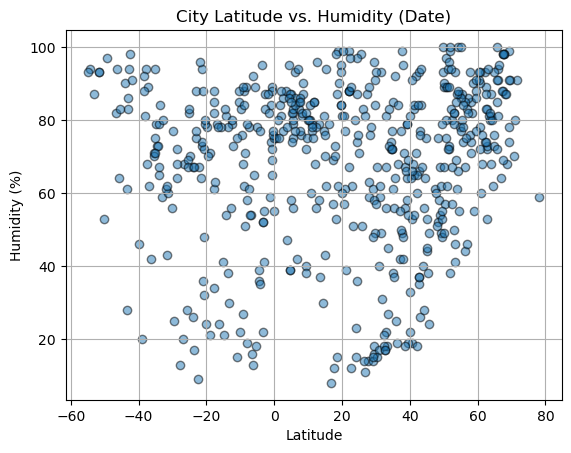

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.5)

# Set the title and labels
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate grid lines
plt.grid()

# Save the figure
plt.savefig("output_data/Fig02.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

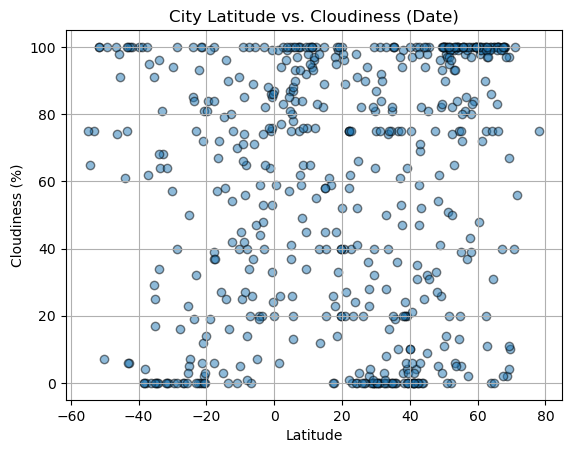

In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.5)

# Set the title and labels
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate grid lines
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

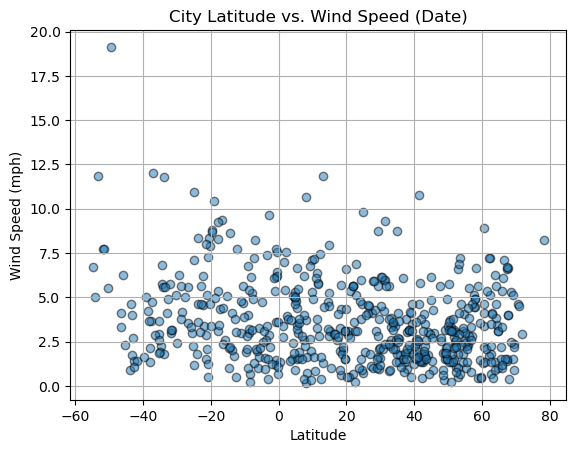

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.5)

# Set the title and labels
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Incorporate grid lines
plt.grid()

# Save the figure
plt.savefig("output_data/Fig04.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create a line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print the correlation coefficient
    print(f"The correlation coefficient (r-value) is: {round(rvalue, 2)}")
    
    # Show plot
    plt.show()


In [13]:
# Filter the original DataFrame to get Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hammerfest,70.6634,23.6821,276.40,70,40,4.63,NO,1696180100
2,shubarkuduk,49.1447,56.4872,289.65,49,82,3.15,KZ,1696180100
7,cestos city,5.4600,-9.5828,299.80,82,78,3.45,LR,1696180101
9,phang nga,8.4509,98.5298,301.17,90,65,1.63,TH,1696180102
11,key west,24.5557,-81.7826,305.15,74,0,4.63,US,1696180036


In [14]:
# Filter the original DataFrame to get Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,howard springs,-12.4970,131.0470,300.10,79,42,0.53,AU,1696180100
3,salinopolis,-0.6136,-47.3561,302.51,69,53,7.53,BR,1696180101
4,west island,-12.1568,96.8225,299.14,73,75,7.72,CC,1696180101
5,port-aux-francais,-49.3500,70.2167,279.41,97,100,19.13,TF,1696180101
6,adamstown,-25.0660,-130.1015,293.79,82,50,10.95,PN,1696180101


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is: -0.81


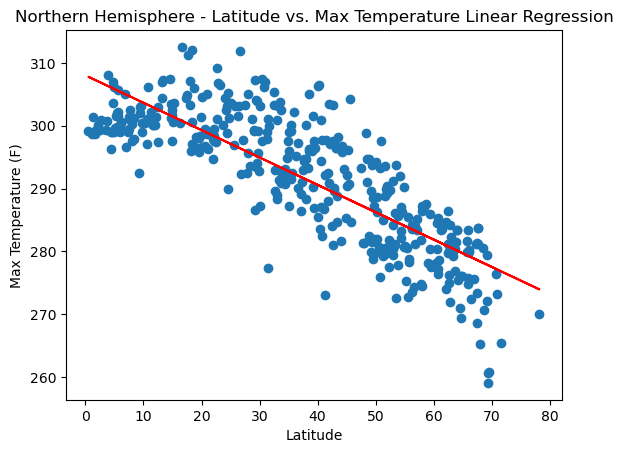

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define a function to create and display linear regression plots with annotation
def plot_linear_regression_with_annotation(x_values, y_values, x_label, y_label, title, coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression values
    regress_values = x_values * slope + intercept
    
    # Create the equation of the regression line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the equation on the plot
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")
    
    # Set the labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Display the correlation coefficient
    print(f"The correlation coefficient (r-value) is: {round(rvalue, 2)}")
    
    # Show the plot
    plt.show()

# Call the function to create and display the linear regression plot with annotation
plot_linear_regression_with_annotation(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                                       "Latitude", "Max Temperature (F)", "Northern Hemisphere - Latitude vs. Max Temperature Linear Regression", (10, 40))


The correlation coefficient (r-value) is: 0.81


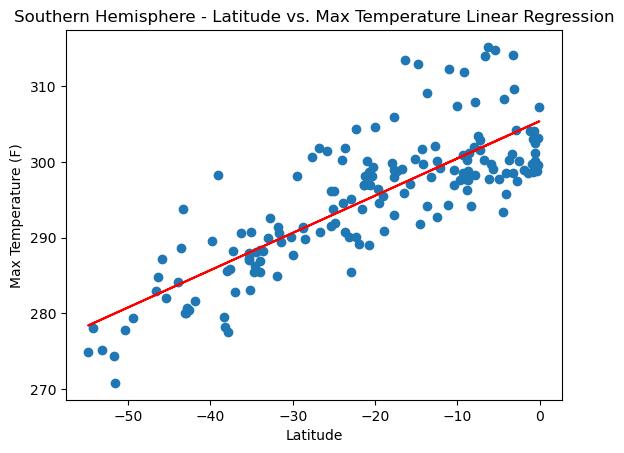

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define a function to create and display linear regression plots with annotation
def plot_linear_regression_with_annotation(x_values, y_values, x_label, y_label, title, coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression values
    regress_values = x_values * slope + intercept
    
    # Create the equation of the regression line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the equation on the plot
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")
    
    # Set the labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Display the correlation coefficient
    print(f"The correlation coefficient (r-value) is: {round(rvalue, 2)}")
    
    # Show the plot
    plt.show()

# Call the function to create and display the linear regression plot with annotation for Southern Hemisphere Max Temperature vs. Latitude
plot_linear_regression_with_annotation(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                                       "Latitude", "Max Temperature (F)", "Southern Hemisphere - Latitude vs. Max Temperature Linear Regression", (-30, 50))



**Discussion about the linear relationship:** Temprature is higher in latitudes closer to zero 

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is: 0.12


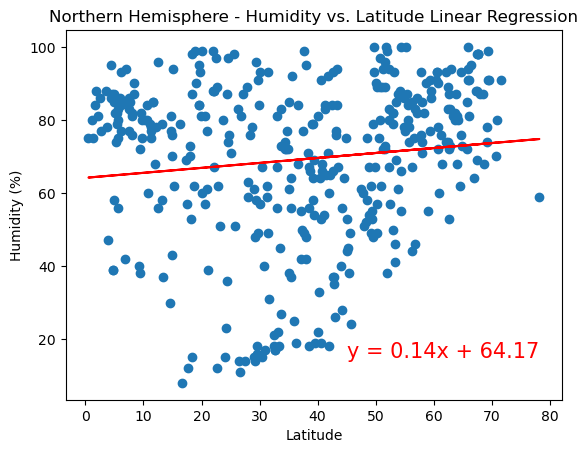

In [17]:
# Import necessary libraries
from scipy.stats import linregress

# Define a function to create and display linear regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression values
    regress_values = x_values * slope + intercept
    
    # Create the equation of the regression line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the equation on the plot
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")
    
    # Set the labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Display the correlation coefficient
    print(f"The correlation coefficient (r-value) is: {round(rvalue, 2)}")
    
    # Show the plot
    plt.show()

# Filter the Northern Hemisphere data for Humidity vs. Latitude
northern_hemi_humidity_df = northern_hemi_df["Humidity"]

# Call the function to create and display the linear regression plot for Humidity vs. Latitude in the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_humidity_df,
                       "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", (45, 15))


The correlation coefficient (r-value) is: -0.19


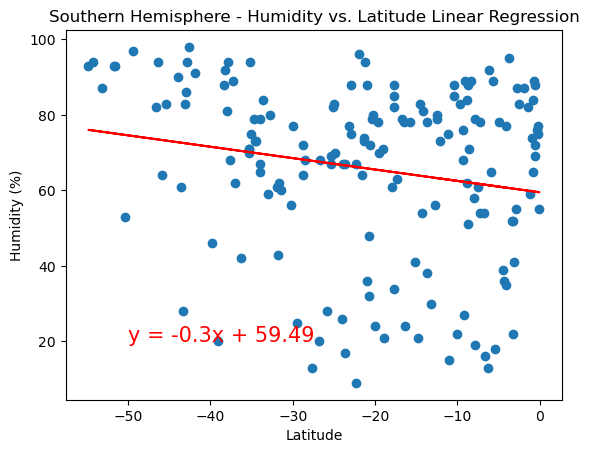

In [18]:
# Filter the Southern Hemisphere data for Humidity vs. Latitude
southern_hemi_humidity_df = southern_hemi_df["Humidity"]

# Call the function to create and display the linear regression plot for Humidity vs. Latitude in the Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_humidity_df,
                       "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", (-50, 20))


**Discussion about the linear relationship:** higher concentration of data points relating to northern hemisphere then in southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is: 0.09


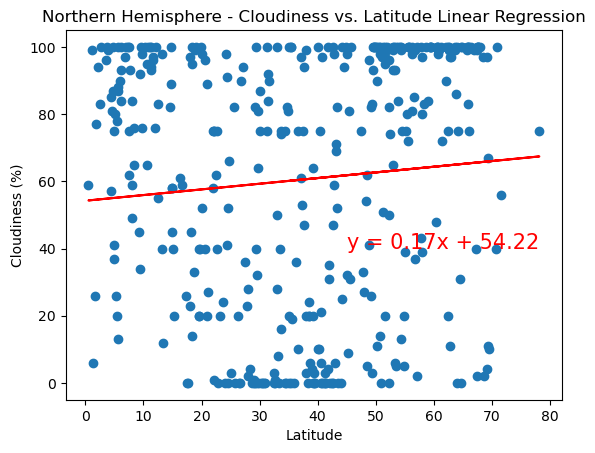

In [19]:
# Filter the Northern Hemisphere data for Cloudiness vs. Latitude
northern_hemi_cloudiness_df = northern_hemi_df["Cloudiness"]

# Call the function to create and display the linear regression plot for Cloudiness vs. Latitude in the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_cloudiness_df,
                       "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", (45, 40))


The correlation coefficient (r-value) is: -0.02


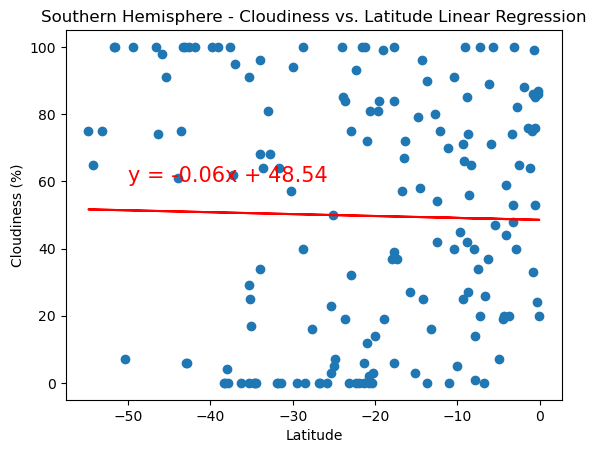

In [20]:
# Filter the Southern Hemisphere data for Cloudiness vs. Latitude
southern_hemi_cloudiness_df = southern_hemi_df["Cloudiness"]

# Call the function to create and display the linear regression plot for Cloudiness vs. Latitude in the Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_cloudiness_df,
                       "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", (-50, 60))


**Discussion about the linear relationship:** higher concentration of data points relating to northern hemisphere then in southern hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is: -0.09


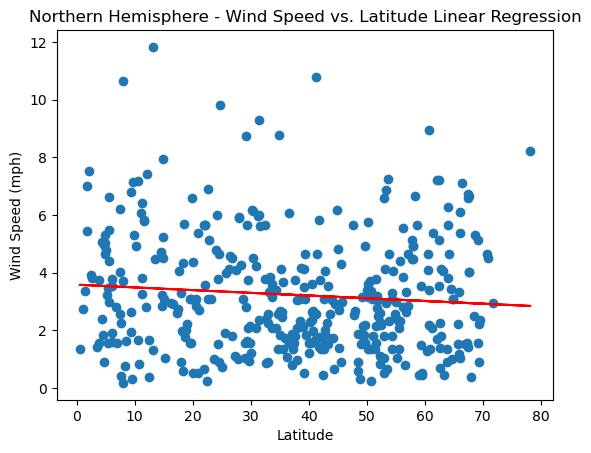

In [21]:
# Filter the Northern Hemisphere data for Wind Speed vs. Latitude
northern_hemi_wind_speed_df = northern_hemi_df["Wind Speed"]

# Call the function to create and display the linear regression plot for Wind Speed vs. Latitude in the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_wind_speed_df,
                       "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", (45, 25))


The correlation coefficient (r-value) is: -0.17


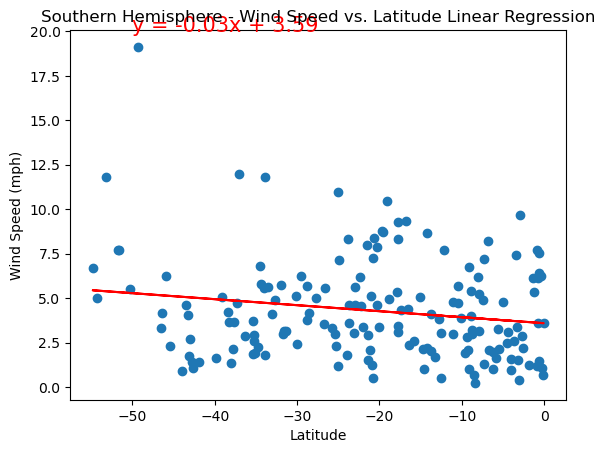

In [22]:
# Filter the Southern Hemisphere data for Wind Speed vs. Latitude
southern_hemi_wind_speed_df = southern_hemi_df["Wind Speed"]

# Call the function to create and display the linear regression plot for Wind Speed vs. Latitude in the Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_wind_speed_df,
                       "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", (-50, 20))


**Discussion about the linear relationship:** wind speeds higher in the southern hemisphere 